# Assignment 2 - DIY LINEAR REGRESSOR!

*This assignment is a part of the project ["Customer Churn Analysis: From Data To Strategy"]*


1.   ## Part-1
In this part, you'll build your own linear regression from scratch by 2 methods that were discuseed in class.

  * OLS (Ordinary Least Square) - This method directly calculates the values of the coefficients in equation y=mx+c.
  * Gradient Descent - This method uses an iterative approach to calculate the values of the coefficients. You'll have to calculate the values of both m and b.
2.   ## Part-2
In this part, you'll get predictions from the model you just built. You'll then evaluate the predictions by following metrics:

    * [R2 Score](https://www.investopedia.com/terms/r/r-squared.asp)
    * [MEAN ABSOLUTE ERROR and ROOT MEAN SQUARED ERROR](https://towardsdatascience.com/what-are-rmse-and-mae-e405ce230383)
3.  ## Part-3
In this part, you'll have to answer some subjective questions.







If you are stuck or have any doubts, please feel free to put your queries on the Whatsapp group.


Deadline : **31 May, 11:59 pm**


# Import necessary libraries
Feel free to modify it as per your requirements.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Part-1


### Linear Regressor with OLS method

In [2]:
class MyLRFromOLS:


  def __init__(self):
      self.m = None
      self.b = None

  def fit(self,X_train,y_train):

    # Calculate values of m and b

    x_mean=X_train.mean()
    y_mean=y_train.mean()

    XY_deviation_sum= sum((X_train-x_mean) *(y_train-y_mean))
    X_square_deviation_sum=sum((X_train-x_mean)**2)

    self.m = XY_deviation_sum/X_square_deviation_sum
    self.b = y_mean - (self.m*x_mean)


  def predict(self,X_test):

    return self.m * X_test + self.b

  def get_coeff(self):
     
     print("m value is ",self.m)
     print("b value is ",self.b)
    # Write code to print the value of m and b

In [3]:
#load dataset
df=pd.read_csv("tvmarketing.csv")

In [4]:
# Separate input and output columns
X = df['TV']
y = df['Sales']

In [5]:
# Train test split of 80/20. Try changing the ratio and see what results you get

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=5)

  ### Prediction time

In [6]:
olslr = MyLRFromOLS()


In [7]:
olslr.fit(X_train,y_train)

In [8]:
olslr_pred = olslr.predict(X_test)

In [9]:
#View predictions
olslr_pred

119     7.838389
77     12.757963
148     8.743474
149     9.069499
154    16.032814
151    12.782294
122    17.794323
6       9.692353
28     19.001103
71     12.237296
188    20.811273
34     11.551183
21     18.446374
40     16.748123
55     16.572945
104    18.485302
3      14.266438
39     17.988965
117    10.612036
134     8.689947
180    14.514607
26     13.847958
54     19.677484
165    18.305258
53     15.779779
93     19.103290
174    17.716467
17     20.587435
56      7.249597
84     17.283388
25     19.687216
156    11.463595
42     21.181093
141    16.319911
50     16.616740
51     11.779888
195     8.753206
116    13.667914
142    17.624012
24      9.925923
Name: TV, dtype: float64

In [10]:
#Get values of m and b
olslr.get_coeff()

m value is  0.0486604818310378
b value is  6.894375384032881


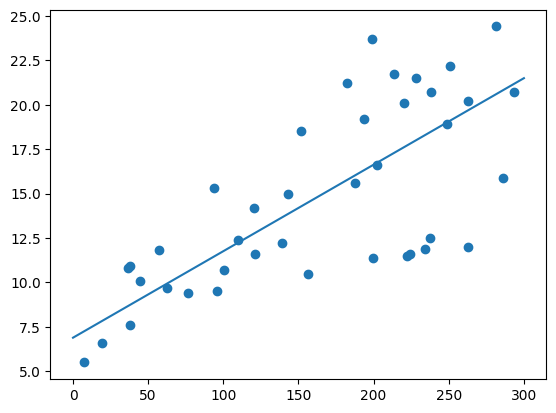

In [11]:
plt.scatter(X_test,y_test)
x=np.linspace(0,300,4)
y=olslr.m*x+olslr.b
plt.plot(x,y)

### Linear Regressor with gradient descent


In [12]:
class MyLRFromGD:

  def __init__(self,learning_rate,epochs):
    self.m = 0 #assign random value
    self.b  = 6 #assign random value
    self.lr = learning_rate
    self.epochs = epochs

  def fit(self,X_train,y_train):
      # calcualte b and m using GD    


    n=len(X_train)
    
    for i in range(self.epochs):


      #y_predicted=(self.m*X_train+self.b)
      #print(self.m*a for a in X_train)
      # print(y_predicted.head(1))
      # print(y_predicted-y_train)

      # Calculate slope wrt b and m
      loss_slope_m = float(2/n) * np.dot(((self.m*X_train)+self.b-y_train),X_train)
      loss_slope_b = float(2/n) * np.sum((self.m*X_train)+self.b-y_train)



      # print(loss_slope_m*self.lr,"  ",self.m,"  ",loss_slope_b,"  ",self.b)


      self.b = self.b - (self.lr * loss_slope_b)
      self.m = self.m - (self.lr * loss_slope_m)
      # print(self.m)


  def predict(self,X_test):
    return self.m * X_test + self.b

  def get_coeff(self):
    #Write code to get values of m and b
    print("m value is ",self.m)
    print("b value is ",self.b)

### Prediction Time
Since we have already split the dataset, we're not going to repeat it again.

In [13]:
#Check with different values of learning_rate and epochs for model convergence
gdlr = MyLRFromGD(0.0000358, 37000)

In [14]:
gdlr.fit(X_train,y_train)

In [15]:
gdlr_pred = gdlr.predict(X_test)

In [16]:
# View predictions
gdlr_pred

119     7.438510
77     12.588683
148     8.386020
149     8.727327
154    16.017037
151    12.614153
122    17.861115
6       9.379376
28     19.124461
71     12.043610
188    21.019480
34     11.325337
21     18.543729
40     16.765875
55     16.582486
104    18.584482
3      14.167865
39     18.064880
117    10.342168
134     8.329984
180    14.427666
26     13.729770
54     19.832546
165    18.395999
53     15.752142
93     19.231438
174    17.779609
17     20.785150
56      6.822119
84     17.326230
25     19.842734
156    11.233642
42     21.406634
141    16.317591
50     16.628334
51     11.564761
195     8.396208
116    13.541286
142    17.682820
24      9.623895
Name: TV, dtype: float64

In [17]:
# Get values of m and b
gdlr.get_coeff()

m value is  0.050941372568663046
b value is  6.4502473836605585


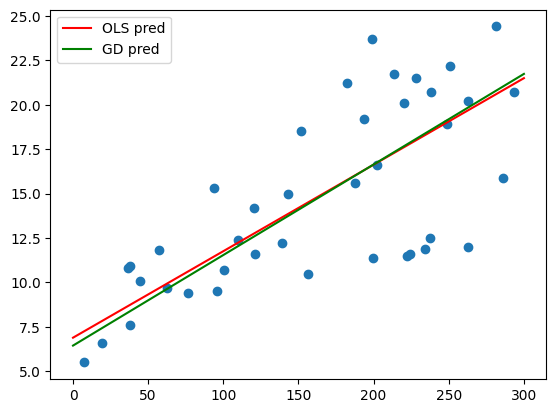

In [29]:
# Compare values of m and b obtained from both methods
plt.scatter(X_test,y_test)
x=np.linspace(0,300,4)
y=olslr.m*x+olslr.b
plt.plot(x,y,'r',label="OLS pred")
Y=gdlr.m*x+gdlr.b
plt.plot(x,Y,'g',label="GD pred")
plt.legend()

# Part-2

### R2 Score
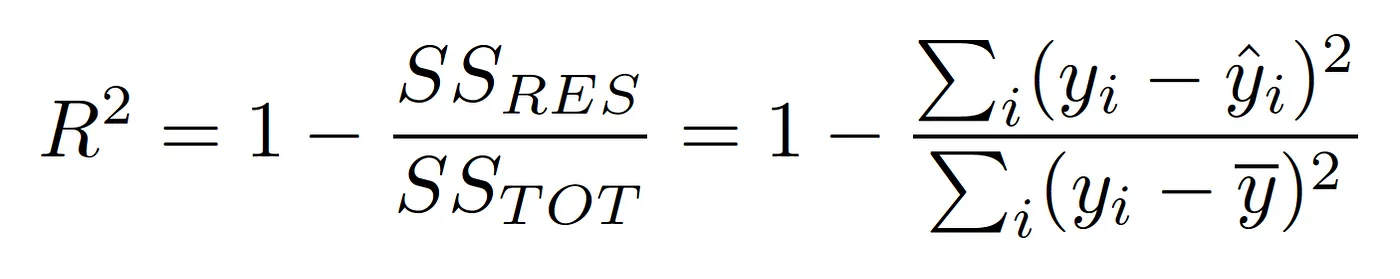

### MEAN ABSOLUTE ERROR
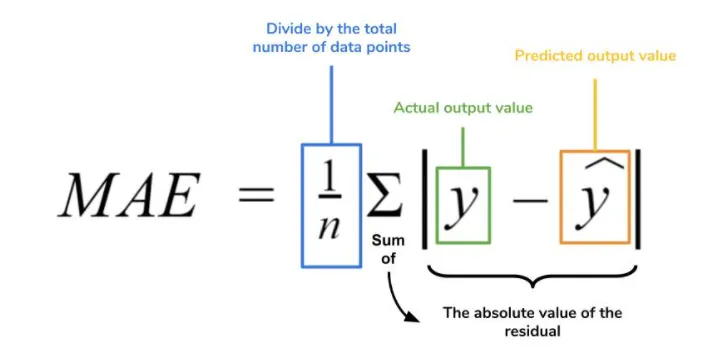

### ROOT MEAN SQUARED ERROR
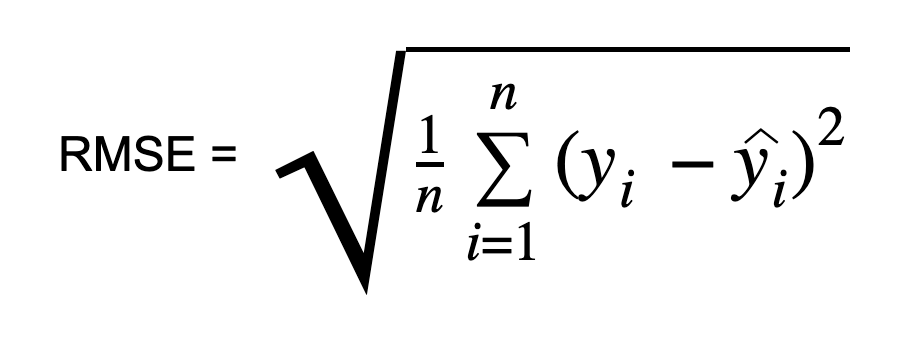

### Evaluation time
Let's see how does both of our models perform.

In [19]:
# Implement R2 Score, MAE and RMSE

class evaluate:

  def __init__(self,y_pred,y_test):
    self.y_pred = y_pred
    self.y_test = y_test

  def r2score(self):
    #Write code here
    num = np.sum((self.y_test-self.y_pred)**2)
    den = np.sum((self.y_test-self.y_test.mean())**2)
    r2score = 1-float(num/den)
    print(r2score)
    

  def mae(self):
    #Write code here
    n=len(self.y_pred)
    mae = float(1/n) * (np.sum(abs(self.y_test-self.y_pred)))
    print(mae)


  def rmse(self):
    #write code here
    n=len(self.y_pred)
    mse= float(1/n) * (np.sum((self.y_test-self.y_pred)**2))
    rmse = mse**(1/2)
    print(rmse)


In [20]:
# First calculate all the metrics for olslr_pred
e1 =evaluate (olslr_pred,y_test)


In [21]:
e1.r2score()


0.4990784791512455


In [22]:
e1.mae()

2.8206196364278027


In [23]:
e1.rmse()

3.5467773583968802


In [24]:
# Now for gdlr_pred

In [25]:
e2 = evaluate (gdlr_pred,y_test)
e2.r2score()

0.49111020706966724


In [26]:
e2.mae()

2.8221819878558385


In [27]:
e2.rmse()

3.574875752752062


# Part-3
In this part you'll have to answer the questions provided in the below google form:

[Questions](https://forms.gle/2KfpQNvmf5fd9MTw9)

**After Submitting the form, you are required to paste the screenshot of the form.**

## Steps to add screenshot:


1.   Take the screenshot of the submitted form.
2.   Now create a text block below this block in whichever IDE you are using, for example, if you are using VS Code, you will get 2 options below and above each block, Code and Markdown, chose the **Markdown** one.
3.   Now insert the image and run the cell.

### Voila!



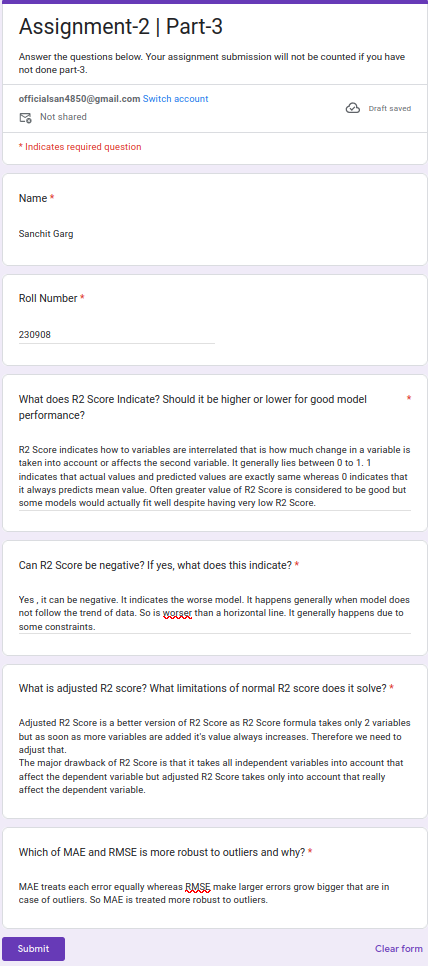